# **ChefBot**

สมาชิกกลุ่ม 1

1. ก้องภพ ทองดี 63340500003 
2. ภคพล ลีลาคหกิจ 63340500045
3. สรพัศ วีระกุล 63340500064
4. อธิเมศร์  เอี๊ยวเจริญ 63340500068 

# **Import Library**

In [51]:
%matplotlib inline
import pandas
import sklearn
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import tensorflow as tf
print(tf. __version__) 
print(tf.config.list_physical_devices('GPU'))

import matplotlib as mpl
import matplotlib.font_manager as fm
np.random.seed(0)
global_seed = 0

pic_path = ''

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## **Import data**

In [52]:
df_orig = pandas.read_csv('../data/Chefbot_Dataset - All.csv', encoding='utf-8')

In [53]:
# Display the first 5 rows of the dataframe
display(df_orig.head(n=5))
# Display the last 5 rows of the dataframe
display(df_orig.tail(n=5))

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็ว มีหน้าตาที่สวยงาม...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่ม และบางกรอบเหมาะกับคนที่...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลม ๆ สามารถแบ่งเป็นชิ้นได้กิน...,พิซซ่า,ค็อกเทลกุ้ง


,Text,Mainclass,Subclass
571,เมนูที่เอาเส้นพาสต้ามาผัดกับของทะเลแล้วแล้วก็ใ...,สปาเกตตี,สปาเกตตีทะเล
572,สปาเกตตีที่มีสีแดง และเขียวตัดกับ สีของเส้นที่...,สปาเกตตี,สปาเกตตีทะเล
573,ฉันอยากกินสปาเกตตีแต่ฉันเบื่อพวกเนื้อ หมู ไก่แ...,สปาเกตตี,สปาเกตตีทะเล
574,สปาเกตตีที่กลิ่นและรสชาติที่จัดจ้านเป็นเอกลักษณ์,สปาเกตตี,สปาเกตตีทะเล
575,สปาเกตตีที่ให้รสชาติเผ็ดจัดจ้าน มีกุ้ง มีหมึก ...,สปาเกตตี,สปาเกตตีทะเล


# **Data Preprocessing**

In [54]:
df_prepro = df_orig.copy()

## **Data Cleaning**

In [55]:
display(df_prepro.describe())
display(df_prepro.Mainclass.unique())
display(df_prepro.Subclass.unique())

,Text,Mainclass,Subclass
count,576,576,576
unique,576,3,12
top,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
freq,1,192,48


array(['พิซซ่า', 'ก๋วยเตี๋ยว', 'สปาเกตตี'], dtype=object)

array(['ค็อกเทลกุ้ง', 'มีทเดอลุกซ์', 'เห็ดและมะเขือเทศ', 'ดิปเปอร์',
       'ก๋วยเตี๋ยวน้ำตก', 'ก๋วยเตี๋ยวต้มยำน้ำใส', 'บะหมีหมูแดงหมูกรอบ',
       'เกาเหลา', 'สปาเกตตีมีทบอล', 'สปาเกตตีคาโบนาร่า', 'สปาเกตตีผัก',
       'สปาเกตตีทะเล'], dtype=object)

### **Remove Duplications in text inputs**

In [56]:
# display all text that appears more than once
display(df_prepro[df_prepro.duplicated('Text', keep=False)].sort_values('Text'))
# Then no duplicates

,Text,Mainclass,Subclass


### **Remove unwanted character**

#### **Front-Back white space**

In [57]:
def strip_space(text):
    return text.strip()

df_prepro['Text'] = df_prepro['Text'].apply(strip_space)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆ กับน้ำสลัดเทาซันไอ...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็ว มีหน้าตาที่สวยงาม...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่ม และบางกรอบเหมาะกับคนที่...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลม ๆ สามารถแบ่งเป็นชิ้นได้กิน...,พิซซ่า,ค็อกเทลกุ้ง


#### **Remove white space between words**

In [58]:
def remove_whitespace(text):
    return text.replace(" ", "")

df_prepro['Text'] = df_prepro['Text'].apply(remove_whitespace)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบๆกับน้ำสลัดเทาซันไอส...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมๆสามารถแบ่งเป็นชิ้นได้กินกั...,พิซซ่า,ค็อกเทลกุ้ง


#### **Remove special character and punctuation**

In [59]:
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
thai_punctuation = 'ๆ'
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation + thai_punctuation))
 
df_prepro['Text'] = df_prepro['Text'].apply(remove_punctuation)
df_prepro.head()

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,พิซซ่า,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,พิซซ่า,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,พิซซ่า,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,พิซซ่า,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,พิซซ่า,ค็อกเทลกุ้ง


### **Label Mapping**

In [60]:
def get_label_map(df, col_name):
    label_map = {}
    for i, label in enumerate(df[col_name].unique()):
        label_map[label] = i
    reversed_label_map = {v: k for k, v in label_map.items()}
    return label_map, reversed_label_map

#### **Get main class labels**

In [61]:
mainclass_label_map, reversed_mainclass_label_map = get_label_map(df_prepro, 'Mainclass')

display(mainclass_label_map)

df_prepro['Mainclass'] = df_prepro['Mainclass'].map(mainclass_label_map)

display(df_prepro.head())

{'พิซซ่า': 0, 'ก๋วยเตี๋ยว': 1, 'สปาเกตตี': 2}

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,0,ค็อกเทลกุ้ง
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,0,ค็อกเทลกุ้ง
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,0,ค็อกเทลกุ้ง
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,0,ค็อกเทลกุ้ง
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,0,ค็อกเทลกุ้ง


#### **Get sub class labels**

In [62]:
subclass_label_map, reversed_subclass_label_map = get_label_map(df_prepro, 'Subclass')

display(subclass_label_map)

df_prepro['Subclass'] = df_prepro['Subclass'].map(subclass_label_map)

display(df_prepro.head())

{'ค็อกเทลกุ้ง': 0,
 'มีทเดอลุกซ์': 1,
 'เห็ดและมะเขือเทศ': 2,
 'ดิปเปอร์': 3,
 'ก๋วยเตี๋ยวน้ำตก': 4,
 'ก๋วยเตี๋ยวต้มยำน้ำใส': 5,
 'บะหมีหมูแดงหมูกรอบ': 6,
 'เกาเหลา': 7,
 'สปาเกตตีมีทบอล': 8,
 'สปาเกตตีคาโบนาร่า': 9,
 'สปาเกตตีผัก': 10,
 'สปาเกตตีทะเล': 11}

,Text,Mainclass,Subclass
0,อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์...,0,0
1,ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามส...,0,0
2,ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ช...,0,0
3,เนื้อหลักเป็นกุ้งมีรสชาติที่จัดจ้านจากซอสมีต้น...,0,0
4,อาหารที่มีลักษณะกลมสามารถแบ่งเป็นชิ้นได้กินกับ...,0,0


# **Keras Preprocessing**

In [63]:
df_keras = df_prepro.copy()

In [64]:
df_keras = df_keras.to_numpy()
df_keras

array([['อยากกินกุ้งที่จะมีความหนุบกับน้ำสลัดเทาซันไอส์แลนด์ที่มีความเข้มข้นหอมแป้งเยอะ',
        0, 0],
       ['ผมชอบอาหารที่สามารถทำได้เร็วมีหน้าตาที่สวยงามสามารถหยิบกินได้เป็นชิ้นเน้นเนื้อที่มาจากทะเล',
        0, 0],
       ['ทำจากแป้งมีทั้งหนานุ่มและบางกรอบเหมาะกับคนที่ชื่นชอบอาหารทะเลราคาไม่แพงหาซื้อได้ง่าย',
        0, 0],
       ...,
       ['ฉันอยากกินสปาเกตตีแต่ฉันเบื่อพวกเนื้อหมูไก่แล้วช่วยแนะนำเมนูให้ฉันหน่อย',
        2, 11],
       ['สปาเกตตีที่กลิ่นและรสชาติที่จัดจ้านเป็นเอกลักษณ์', 2, 11],
       ['สปาเกตตีที่ให้รสชาติเผ็ดจัดจ้านมีกุ้งมีหมึกมีหอยและยังใส่พวกพริกไทยอ่อน',
        2, 11]], dtype=object)

## **Word Tokenization**

In [65]:
import pythainlp
from pythainlp import word_tokenize
from keras.utils import pad_sequences

In [66]:
input_tokenize = df_keras.copy()
for i, sentence in enumerate(input_tokenize[:, 0]):
    input_tokenize[i, 0] = np.array(word_tokenize(sentence, engine='newmm'), dtype=object)

input_tokenize = np.asarray(input_tokenize, dtype=object)

max_len = max(len(seq) for seq in input_tokenize[:, 0]) + 10

for i in range(len(input_tokenize)):
    input_tokenize[i, 0] = np.pad(input_tokenize[i, 0], (0, max_len - len(input_tokenize[i, 0])), constant_values=" ")

print("Example after padding:")
print(input_tokenize[500])

print(f"Data shape: {input_tokenize.shape}")

for seq in input_tokenize[:, 0]:
    if seq.shape[0] != 50:
        print("ไม่เท่ากับ 50")

print("เท่ากับ 50")

Example after padding:
[array(['อยาก', 'กิน', 'อะไร', 'ก็', 'ได้ที่', 'มี', 'ชีส', 'ผัก', 'เพราะ',
        'กิน', 'คีโม', 'ขอ', 'เมนู', 'ทำ', 'ง่าย', 'ใช้เวลา', 'ไม่', 'นาน',
        'มี', 'สารอาหาร', 'พวก', 'คา', 'โบ', 'ไฮ', 'เด', 'รต', ' ', ' ',
        ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
        ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '], dtype=object)
 2 10]
Data shape: (576, 3)
เท่ากับ 50


In [67]:
sentence = input_tokenize[:, 0]
mainclass_labels = input_tokenize[:, 1]
subclass_labels = input_tokenize[:, 2]

print(f'Example sentence: {sentence[0]}')
print(f'Example mainclass label: {mainclass_labels[0]}')
print(f'Example subclass label: {subclass_labels[0]}')

print('Shape')
print(f'Sentence: {sentence.shape}')
print(f'Mainclass label: {mainclass_labels.shape}')
print(f'Subclass label: {subclass_labels.shape}')

Example sentence: ['อยาก' 'กิน' 'กุ้ง' 'ที่จะ' 'มี' 'ความ' 'หนุบ' 'กับ' 'น้ำสลัด' 'เทา'
 'ซัน' 'ไอส์แลนด์' 'ที่' 'มี' 'ความ' 'เข้มข้น' 'หอม' 'แป้ง' 'เยอะ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '
 ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
Example mainclass label: 0
Example subclass label: 0
Shape
Sentence: (576,)
Mainclass label: (576,)
Subclass label: (576,)


## **Word Count**

In [68]:
from collections import Counter

word_counts = Counter()
for data in input_tokenize[:,0]:
    word_counts.update(data)
    
display(word_counts.most_common(15))

[(' ', 16825),
 ('มี', 630),
 ('ที่', 580),
 ('กิน', 360),
 ('และ', 325),
 ('เป็น', 251),
 ('อาหาร', 235),
 ('เส้น', 220),
 ('ได้', 185),
 ('อยาก', 160),
 ('กับ', 144),
 ('ไม่', 140),
 ('ของ', 134),
 ('รสชาติ', 132),
 ('ผัก', 125)]

In [69]:
# Find maximym vocabulary size
max_vocab_size = len(word_counts) + 1 # +1 for unknown token
print(f'Maximum vocabulary size from data set: {max_vocab_size}')
# Find maximum sentence length
max_len = max([len(sentence) for sentence in input_tokenize[:,0]])
print(f'Maximum sentence length from data set: {max_len}')

# Set parameters
max_vocab_size = 5000 # Set maximum vocabulary size to 5000 word (including unknown token)
max_len = 50 # Set maximum sentence length to 50 word per input text

Maximum vocabulary size from data set: 1262
Maximum sentence length from data set: 50


## **Word Vectorization**

In [70]:
sentence[0]

array(['อยาก', 'กิน', 'กุ้ง', 'ที่จะ', 'มี', 'ความ', 'หนุบ', 'กับ',
       'น้ำสลัด', 'เทา', 'ซัน', 'ไอส์แลนด์', 'ที่', 'มี', 'ความ',
       'เข้มข้น', 'หอม', 'แป้ง', 'เยอะ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ',
       ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
      dtype=object)

In [71]:
from pythainlp import word_vector
wordVector = word_vector.WordVector(model_name="thai2fit_wv").get_model() # load thai2fit_wv from pythainlp

In [72]:
def map_word_to_vector(word):
    try:
        return wordVector[word]
    except KeyError:
        return np.zeros(wordVector.vector_size)

sentence_vector = np.array([np.array([map_word_to_vector(word) for word in sentence]) for sentence in input_tokenize[:,0]],dtype=object)

print(f'Sentence vector shape: {sentence_vector.shape}')

Sentence vector shape: (576, 50, 300)


In [73]:
sentence_vector[0].shape

(50, 300)

In [74]:
sentence_vector[0][0].shape

(300,)

### **One-hot encoding**

In [75]:
from keras.utils import to_categorical

mainclass_labels = to_categorical(mainclass_labels)
subclass_labels = to_categorical(subclass_labels)

print('Mainclass labels shape:', mainclass_labels.shape)
print('Subclass labels shape:', subclass_labels.shape)

Mainclass labels shape: (576, 3)
Subclass labels shape: (576, 12)


## **Train-Test Split**

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train_main_class, y_test_main_class, y_train_sub_class, y_test_sub_class = train_test_split(sentence_vector, mainclass_labels, subclass_labels, train_size=0.8, shuffle=True)


In [77]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train_main_class shape: {y_train_main_class.shape}')
print(f'y_train_sub_class shape: {y_train_sub_class.shape}')
print('-----------------------------------------')
print(f'X_test shape: {X_test.shape}')
print(f'y_test_main_class shape: {y_test_main_class.shape}')
print(f'y_test_sub_class shape: {y_test_sub_class.shape}')

X_train shape: (460, 50, 300)
y_train_main_class shape: (460, 3)
y_train_sub_class shape: (460, 12)
-----------------------------------------
X_test shape: (116, 50, 300)
y_test_main_class shape: (116, 3)
y_test_sub_class shape: (116, 12)


Converting the data from numpy array to Tensorflow Dataset

In [78]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_main_class = tf.convert_to_tensor(y_train_main_class, dtype=tf.float32)
y_test_main_class = tf.convert_to_tensor(y_test_main_class, dtype=tf.float32)
y_train_sub_class = tf.convert_to_tensor(y_train_sub_class, dtype=tf.float32)
y_test_sub_class = tf.convert_to_tensor(y_test_sub_class, dtype=tf.float32)

# **Modeling**

In [79]:
# Train model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from time import time
from datetime import timedelta
import keras
from keras.models import load_model
import os

from keras.utils import plot_model

# Build model
from keras.models import Sequential, Model
from keras.layers import Embedding, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking,LSTM, GlobalAveragePooling1D, Conv1D, MaxPooling1D, Flatten,GlobalMaxPooling1D
from keras.layers import Concatenate, Lambda, Reshape, RepeatVector,Multiply
from keras.optimizers import Adam
from keras import backend as K                                                          
from keras.callbacks import ModelCheckpoint, TensorBoard

# Classifications report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay ,multilabel_confusion_matrix, accuracy_score

## **Sub Class Model**

# Test Layer

In [80]:
samples = 10
tensor_shape = ()
ones_tensor = np.ones(tensor_shape)

gdata = np.array([ones_tensor] * samples)
gdata = tf.convert_to_tensor(gdata, dtype=tf.float32)
gdata 

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)>

In [81]:
gdata = Reshape((-1,))(gdata)
gdata

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [82]:
gdata = RepeatVector(64)(gdata)
gdata

<tf.Tensor: shape=(10, 64, 1), dtype=float32, numpy=
array([[[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]],

       [[1.],
        [1.],
        [1.],
       

In [83]:
gdata = Reshape((64,))(gdata)
gdata

<tf.Tensor: shape=(10, 64), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1.,

In [84]:
gdata = RepeatVector(48)(gdata)
gdata

<tf.Tensor: shape=(10, 48, 64), dtype=float32, numpy=
array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 

In [85]:
samples = 460
tensor_shape = (50, 300)
ones_tensor = np.ones(tensor_shape)

xdata = np.array([ones_tensor] * samples)
xdata = tf.convert_to_tensor(xdata, dtype=tf.float32)

In [86]:
xdata

<tf.Tensor: shape=(460, 50, 300), dtype=float32, numpy=
array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1.

# Test model 1

In [111]:
main_class_label.index(main_class)

2

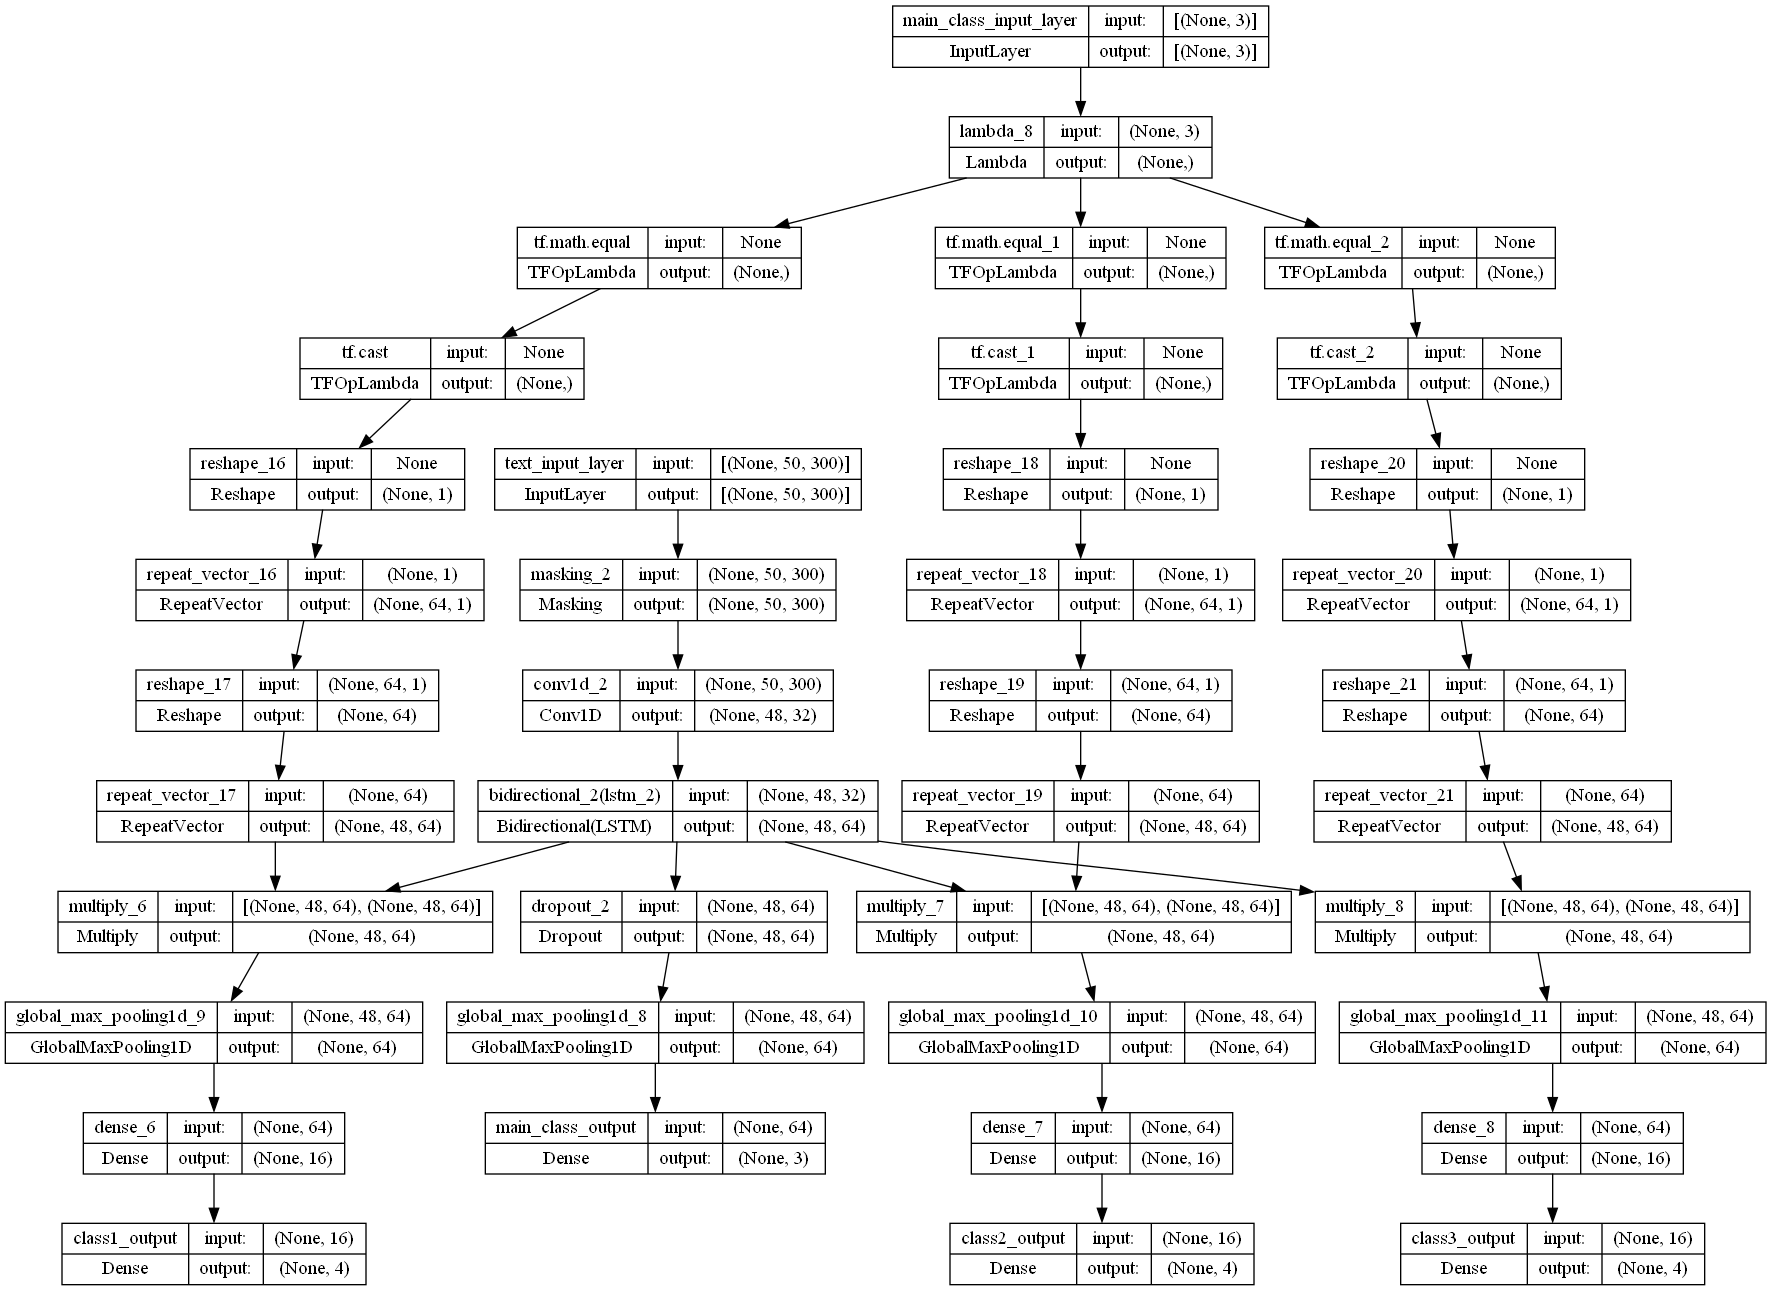

In [99]:
# Test model
max_len = 50
word_vector_size = 300
main_class_label = ['class1', 'class2', 'class3']
sub_class_label = {'class1': ['sub11', 'sub12', 'sub13', 'sub14'],
                   'class2': ['sub21', 'sub22', 'sub23', 'sub24'],
                   'class3': ['sub31', 'sub32', 'sub33', 'sub34']}
# Test model
# Define inputs
text_input_layer  = Input(shape=(max_len, word_vector_size), dtype='float32', name='text_input_layer')
main_class_input_layer  = Input(shape=(len(main_class_label),), dtype='float32', name='main_class_input_layer')

# Define layers
masking_layer = Masking(mask_value=0.0)(text_input_layer)
conv1d_layer_1 = Conv1D(filters=32, kernel_size=3, activation='relu')(masking_layer)
bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True))(conv1d_layer_1)
dropout_layer_1 = Dropout(0.2)(bi_lstm_layer_1)
global_max_pooling_layer_1 = GlobalMaxPooling1D()(dropout_layer_1)

# Main class output
main_class_output_layer = Dense(len(main_class_label), activation='softmax', name='main_class_output')(global_max_pooling_layer_1)

main_class_input_argmax = Lambda(lambda x: K.argmax(x))(main_class_input_layer)

# Sub class output
maskoutput = {}
sub_class_output_layers = {}
for main_class in main_class_label:
    # Create binary mask that is 1 only when the main class is correct
    # binary_mask = K.cast(K.equal(K.argmax(main_class_output_layer), main_class_label.index(main_class)), dtype='float32')
    binary_mask = K.cast(K.equal(main_class_input_argmax, main_class_label.index(main_class)), dtype='float32')
    # binary_mask = Lambda(lambda x: K.cast(K.equal(x, main_class_label.index(main_class)), dtype='float32'))(main_class_input_argmax)
    # binary_mask = main_class_input_layer[:, main_class_label.index(main_class)]
    reshape_binary_mask = Reshape((-1,))(binary_mask)
    
    repeat_binary_mask_1 = RepeatVector(64)(reshape_binary_mask)
    
    reshape_repeat_binary_mask = Reshape((64,))(repeat_binary_mask_1)
    
    repeat_binary_mask_2 = RepeatVector(48)(reshape_repeat_binary_mask)
    
    # Apply the binary mask to the dense layer output
    masked_dense_layer = Multiply()([bi_lstm_layer_1, repeat_binary_mask_2])
    
    sub_class_global_max_pooling_layer_1 = GlobalMaxPooling1D()(masked_dense_layer)
    
    # Define dense layer for each sub class outputs
    sub_class_dense_layer = Dense(16, activation='relu')(sub_class_global_max_pooling_layer_1)
    
    # Define dense layer for each sub class outputs
    sub_class_output_layer = Dense(len(sub_class_label[main_class]), activation='softmax', name=main_class+'_output')(sub_class_dense_layer)

    # Add the masked dense layer to the sub class output dictionary
    sub_class_output_layers[main_class] = sub_class_output_layer
    maskoutput[main_class] = masked_dense_layer


# Define the model
model = Model(inputs=[text_input_layer, main_class_input_layer], outputs=[main_class_output_layer, list(sub_class_output_layers.values()),maskoutput,main_class_input_argmax])
plot_model(model, to_file=pic_path+'modeltest.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [100]:
output = model.predict(x = [xdata, y_train_main_class])
output = np.array(output, dtype=object)

15/15 [==============================] - 1s 6ms/step


# Checkoutput

## Argmax

In [101]:
argmax = output[3]
argmax

array([2, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0,
       1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1,
       0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2, 0, 2, 2, 1, 2, 2,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 2, 0, 1,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 2,
       0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2,
       2, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1,
       1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 2, 1,
       2, 1, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 1, 2, 0, 1, 2, 1, 1, 1,
       0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 0, 1, 2, 0, 2, 2, 1, 0, 1,
       1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0,

## Mutiply output

In [102]:
mutipy = output[2]

In [103]:
mutipy

{'class1': array([[[-0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        , -0.        ],
         [-0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        , -0.        ],
         [-0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        , -0.        ],
         ...,
         [-0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        , -0.        ],
         [-0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        , -0.        ],
         [-0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        , -0.        ]],
 
        [[-0.29116467,  0.07478961,  0.14135422, ...,  0.16057582,
           0.7159216 , -0.11727618],
         [-0.43311062,  0.11907978,  0.19991471, ...,  0.16058613,
           0.71593124, -0.11727791],
         [-0.49902457,  0.14079773,  0.2250235 , ...,  0.1605992 ,
           0.71593976, -0.11727857],
         ...,
         [-0.58203256, 

In [104]:
print(f'Mutipy class 1 shape: {mutipy["class1"].shape}')
print(f'Member of class 1 shape: {mutipy["class1"][0].shape}')

Mutipy class 1 shape: (460, 48, 64)
Member of class 1 shape: (48, 64)


### First element

In [105]:
mutipy['class1'][0]

array([[-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       ...,
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.]], dtype=float32)

In [106]:
mutipy['class2'][0]

array([[-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       ...,
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.]], dtype=float32)

In [107]:
mutipy['class3'][0]

array([[-0.29116467,  0.07478961,  0.14135422, ...,  0.16057582,
         0.7159216 , -0.11727618],
       [-0.43311062,  0.11907978,  0.19991471, ...,  0.16058613,
         0.71593124, -0.11727791],
       [-0.49902457,  0.14079773,  0.2250235 , ...,  0.1605992 ,
         0.71593976, -0.11727857],
       ...,
       [-0.58203256,  0.13710411,  0.23007302, ...,  0.11186072,
         0.5045984 , -0.09421589],
       [-0.5820327 ,  0.13709563,  0.23007357, ...,  0.08480208,
         0.39066613, -0.07369801],
       [-0.5820339 ,  0.13708164,  0.23007415, ...,  0.04770854,
         0.22139451, -0.04312694]], dtype=float32)

### Second element

In [108]:
mutipy['class1'][1]

array([[-0.29116467,  0.07478961,  0.14135422, ...,  0.16057582,
         0.7159216 , -0.11727618],
       [-0.43311062,  0.11907978,  0.19991471, ...,  0.16058613,
         0.71593124, -0.11727791],
       [-0.49902457,  0.14079773,  0.2250235 , ...,  0.1605992 ,
         0.71593976, -0.11727857],
       ...,
       [-0.58203256,  0.13710411,  0.23007302, ...,  0.11186072,
         0.5045984 , -0.09421589],
       [-0.5820327 ,  0.13709563,  0.23007357, ...,  0.08480208,
         0.39066613, -0.07369801],
       [-0.5820339 ,  0.13708164,  0.23007415, ...,  0.04770854,
         0.22139451, -0.04312694]], dtype=float32)

In [109]:
mutipy['class1'][2]

array([[-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       ...,
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.]], dtype=float32)

In [110]:
mutipy['class2'][3]

array([[-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       ...,
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.],
       [-0.,  0.,  0., ...,  0.,  0., -0.]], dtype=float32)

In [ ]:
class MainSubclassPrediction(Model):
    def __init__(self, max_len, word_vector_size):
        super(MainSubclassPrediction, self).__init__()

        self.max_len = max_len
        self.word_vector_size = word_vector_size
        self.main_class_label = ['Pizza', 'Noodle', 'Spaghetti']
        self.sub_class_label = {
            'Pizza': ['ShrimpCocktail', 'MeatDeluxe', 'MushroomsTomatoes', 'Dipper'],
            'Noodle': ['NamTok', 'TomYam', 'EggNoodles', 'Kaolao'],
            'Spaghetti': ['Meatball', 'Carbonara', 'Vegetable', 'Seafood']
        }
        
        # Model layers (functional API)
        # Main class prediction sub-model
        self.main_class_masking_layer = Masking(mask_value=0.0)
        self.main_class_conv1d_layer_1 = Conv1D(filters=32, kernel_size=3, activation='relu')
        self.main_class_bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True))
        self.main_class_dropout_layer_1 = Dropout(0.2)
        # Main class prediction layer
        self.main_class_global_max_pooling_1d_layer = GlobalMaxPooling1D()
        self.main_class_output_layer = Dense(len(self.main_class_label), activation='softmax', name='main_class_output')
        
        # Sub class prediction sub-model
        # Sub class of main class 0
        self.sub_class_0_bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True))
        self.sub_class_0_global_max_pooling_1d_layer = GlobalMaxPooling1D()
        self.sub_class_0_dense_layer_1 = Dense(64, activation='relu')
        
        self.build_model()
    
    def get_mainclass_inference_model(self):
        # Define inputs
        text_input_layer  = Input(shape=(self.max_len, self.word_vector_size), dtype='float32', name='text_input_layer')
        # Define layers
        masking_layer = self.main_class_masking_layer(text_input_layer)
        conv1d_layer_1 = self.main_class_conv1d_layer_1(masking_layer)
        bi_lstm_layer_1 = self.main_class_bi_lstm_layer_1(conv1d_layer_1)
        dropout_layer_1 = self.main_class_dropout_layer_1(bi_lstm_layer_1)
        # Main class output
        global_max_pooling_layer_1 = self.main_class_global_max_pooling_1d_layer(dropout_layer_1)
        main_class_output_layer = self.main_class_output_layer(global_max_pooling_layer_1)
        # Main class inference model
        main_class_inference_model = Model(inputs=text_input_layer, outputs=main_class_output_layer, name='main_class_inference_model')
        return main_class_inference_model

    def build_model(self):
        # Define inputs
        text_input_layer  = Input(shape=(self.max_len, self.word_vector_size), dtype='float32', name='text_input_layer')
        main_class_input_layer  = Input(shape=(len(self.main_class_label),), dtype='float32', name='main_class_input_layer')

        # Define layers
        masking_layer = self.main_class_masking_layer(text_input_layer)
        conv1d_layer_1 = self.main_class_conv1d_layer_1(masking_layer)
        bi_lstm_layer_1 = self.main_class_bi_lstm_layer_1(conv1d_layer_1)
        dropout_layer_1 = self.main_class_dropout_layer_1(bi_lstm_layer_1)

        # Main class output
        global_max_pooling_layer_1 = self.main_class_global_max_pooling_1d_layer(dropout_layer_1)
        main_class_output_layer = self.main_class_output_layer(global_max_pooling_layer_1)

        # Argmax of main class input
        main_class_input_argmax = Lambda(lambda x: K.argmax(x))(main_class_input_layer)

        # Sub class output
        sub_class_output_layers = {}
        for main_class in self.main_class_label:
            # Create binary mask that is 1 only when the main class is correct
            # binary_mask = K.cast(K.equal(K.argmax(main_class_output_layer), main_class_label.index(main_class)), dtype='float32')
            binary_mask = K.cast(K.equal(main_class_input_argmax, self.main_class_label.index(main_class)), dtype='float32')
            # binary_mask = main_class_input_layer[:, main_class_label.index(main_class)]
            reshape_binary_mask = Reshape((-1,))(binary_mask)
            
            repeat_binary_mask_1 = RepeatVector(64)(reshape_binary_mask)
            
            reshape_repeat_binary_mask = Reshape((64,))(repeat_binary_mask_1)
            
            repeat_binary_mask_2 = RepeatVector(48)(reshape_repeat_binary_mask)
            
            # Apply the binary mask to the dense layer output
            masked_dense_layer = Multiply()([dropout_layer_1, repeat_binary_mask_2])
            
            sub_class_bi_lstm_layer_1 = Bidirectional(LSTM(32, return_sequences=True))(masked_dense_layer)
            
            sub_class_global_max_pooling_layer_1 = GlobalMaxPooling1D()(sub_class_bi_lstm_layer_1)
            
            # Define dense layer for each sub class outputs
            sub_class_dense_layer = Dense(64, activation='relu')(sub_class_global_max_pooling_layer_1)
            
            # Define dense layer for each sub class outputs
            sub_class_output_layer = Dense(len(self.sub_class_label[main_class]), activation='softmax', name=main_class+'_output')(sub_class_dense_layer)

            # Add the masked dense layer to the sub class output dictionary
            sub_class_output_layers[main_class] = sub_class_output_layer

        # Concatenate all sub class output layers
        concat_sub_class_output_layers = Concatenate(name = 'sub_class_output')(list(sub_class_output_layers.values()))

        # Define the model
        self.model = Model(inputs=[text_input_layer, main_class_input_layer], outputs=[main_class_output_layer, concat_sub_class_output_layers])

        loss = {'main_class_output': 'categorical_crossentropy',
                'sub_class_output': 'categorical_crossentropy'}
        loss_weights = {'main_class_output': 1.0,
                        'sub_class_output': 1.0}
        metrics = {'main_class_output': 'accuracy',
                    'sub_class_output': 'accuracy'}
        optimizer = Adam(learning_rate=0.001)
        self.model.compile(optimizer=optimizer, loss=loss, loss_weights=loss_weights, metrics=metrics)

    def train(self, train_data, epochs, batch_size, validation_data=None, model_path=None):
        [X_text_train, x_main_class_train], [y_main_class_train, y_sub_class_train] = train_data
        if validation_data is not None:
            [X_text_val, x_main_class_val], [y_main_class_val, y_sub_class_val] = validation_data
            self.model.fit(x={'text_input_layer': X_text_train,
                              'main_class_input_layer': x_main_class_train},
                            y={'main_class_output': y_main_class_train,
                                'sub_class_output': y_sub_class_train},
                            validation_data=({'text_input_layer': X_text_val,
                                              'main_class_input_layer': x_main_class_val},
                                                {'main_class_output': y_main_class_val,
                                                'sub_class_output': y_sub_class_val}),
                            epochs=epochs,
                            batch_size=batch_size)
        else:
            self.model.fit(x={'text_input_layer': X_text_train,
                             'main_class_input_layer': x_main_class_train},
                            y={'main_class_output': y_main_class_train,
                                'sub_class_output': y_sub_class_train},
                            epochs=epochs,
                            batch_size=batch_size)

        if model_path is not None:
            self.model.save(model_path)

    def predict_with_main_label(self, X_text, X_main_class):
        pred_main, pred_sub = self.model.predict({'text_input_layer': X_text, 'main_class_input_layer': X_main_class})
        pred_main = np.argmax(pred_main, axis=1)
        pred_sub = np.argmax(pred_sub, axis=1)
        return pred_main, pred_sub
    
    def plot_result(self, Y_true_main, Y_true_sub, Y_pred_main, Y_pred_sub):
        # Get label names
        main_class_label = self.main_class_label
        subclass_label = [sub_class for main_class in self.sub_class_label for sub_class in self.sub_class_label[main_class]]
        # Print classification report
        print(f'Classification report for main class:\n{classification_report(Y_true_main, Y_pred_main,target_names=main_class_label,zero_division=1)}')
        print(f'Classification report for sub class:\n{classification_report(Y_true_sub, Y_pred_sub,target_names=subclass_label,zero_division=1)}')
        # PLot confusion matrix
        plt.figure(figsize=(10,10))
        cm_main = confusion_matrix(Y_true_main, Y_pred_main)
        disp_main = ConfusionMatrixDisplay(confusion_matrix=cm_main, display_labels=main_class_label)
        disp_main.plot()
        cm_sub = confusion_matrix(Y_true_sub, Y_pred_sub)
        disp_sub = ConfusionMatrixDisplay(confusion_matrix=cm_sub, display_labels=subclass_label)
        disp_sub.plot()